#  F-тест: значимость регрессии

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import statsmodels.formula.api as smf
import scipy.stats as stats

## 1.2 Значимость некоторых регрессоров. t-тест.

In [2]:
date_string = '''Observations     706         706         706         706    
R2              0.132       0.131       0.128       0.007   
AdjustedR2     0.121       0.123       0.121       0.002 ''' 

In [3]:
df = pd.read_csv(io.StringIO(date_string), 
    delimiter='\s+', header=None, index_col=0)
df

,1,2,3,4
0,,,,
Observations,706.000,706.000,706.000,706.000
R2,0.132,0.131,0.128,0.007
AdjustedR2,0.121,0.123,0.121,0.002


In [4]:
df = df.transpose()
df

,Observations,R2,AdjustedR2
1,706.0,0.132,0.121
2,706.0,0.131,0.123
3,706.0,0.128,0.121
4,706.0,0.007,0.002


In [5]:
# Заполним столбец значением m
df['m'] = [10,8,6,5]
df

,Observations,R2,AdjustedR2,m
1,706.0,0.132,0.121,10
2,706.0,0.131,0.123,8
3,706.0,0.128,0.121,6
4,706.0,0.007,0.002,5


In [6]:
df['F_nab'] = (df['R2']/(1-df['R2']))*((df['Observations']-df['m'])/(df['m']-1))
df

,Observations,R2,AdjustedR2,m,F_nab
1,706.0,0.132,0.121,10,11.760369
2,706.0,0.131,0.123,8,15.031728
3,706.0,0.128,0.121,6,20.550459
4,706.0,0.007,0.002,5,1.235398


In [7]:
alpha = 0.05
df['F_cr'] = stats.f.ppf(1-alpha/2,df['m']-1,df['Observations'] - df['m'])
df

,Observations,R2,AdjustedR2,m,F_nab,F_cr
1,706.0,0.132,0.121,10,11.760369,2.131961
2,706.0,0.131,0.123,8,15.031728,2.305650
3,706.0,0.128,0.121,6,20.550459,2.584593
4,706.0,0.007,0.002,5,1.235398,2.804058


In [8]:
df['znachimost'] = df.apply(lambda x : 'znachima' if x['F_nab'] > x['F_cr'] else 'neznachimo', axis = 1)
df

,Observations,R2,AdjustedR2,m,F_nab,F_cr,znachimost
1,706.0,0.132,0.121,10,11.760369,2.131961,znachima
2,706.0,0.131,0.123,8,15.031728,2.305650,znachima
3,706.0,0.128,0.121,6,20.550459,2.584593,znachima
4,706.0,0.007,0.002,5,1.235398,2.804058,neznachimo


## 2.1 Значимость отдельных коэффициентов регрессии. t-тест.

In [9]:
# Когда копируем строку необходимо строку данных преобразовать таким образом, чтобы все подстроки содержали одинаковое количество
# элементов, разделённых пустыми строками. Для этого добавим один элемент в самое начало 1й подстроки ('coeff')  и удалим лишние пробелы
date_string = '''coeff Estimate  Std.Error t_value  Pr(>|t|)    
(Intercept) 3587.178292  220.238404 16.2877 <2.2e-16***
totwrk        -0.149121    0.026286 -5.6730 2.055e-08***
age           -6.258663   11.191863 -0.5592  0.576194    
I(age^2)       0.106517    0.133767  0.7963  0.426135    
male         161.890143   82.177481  1.9700  0.049232*  
south        112.143584   40.717344  2.7542  0.006037** 
totwrk:male   -0.034694    0.036279 -0.9563  0.339238   '''

In [10]:
# date_string.replace('*+','')
df=pd.read_csv(io.StringIO(date_string), sep='\s+')
df

,coeff,Estimate,Std.Error,t_value,Pr(>|t|)
0,(Intercept),3587.178292,220.238404,16.2877,<2.2e-16***
1,totwrk,-0.149121,0.026286,-5.6730,2.055e-08***
2,age,-6.258663,11.191863,-0.5592,0.576194
3,I(age^2),0.106517,0.133767,0.7963,0.426135
4,male,161.890143,82.177481,1.9700,0.049232*
5,south,112.143584,40.717344,2.7542,0.006037**
6,totwrk:male,-0.034694,0.036279,-0.9563,0.339238


In [11]:
# критическое значение t_critical находим из таблицы Стьюдента
t_critical = stats.t.ppf(1-0.05/2,706)
t_critical

1.9633298120697251

In [12]:
df['Значимость'] = df.apply(lambda x : 'Значим' if np.abs(x['Estimate']/x['Std.Error'])>t_critical else 'Не значим' , axis = 1)
df

,coeff,Estimate,Std.Error,t_value,Pr(>|t|),Значимость
0,(Intercept),3587.178292,220.238404,16.2877,<2.2e-16***,Значим
1,totwrk,-0.149121,0.026286,-5.6730,2.055e-08***,Значим
2,age,-6.258663,11.191863,-0.5592,0.576194,Не значим
3,I(age^2),0.106517,0.133767,0.7963,0.426135,Не значим
4,male,161.890143,82.177481,1.9700,0.049232*,Значим
5,south,112.143584,40.717344,2.7542,0.006037**,Значим
6,totwrk:male,-0.034694,0.036279,-0.9563,0.339238,Не значим


#### Потестируем совместную значимость `smsa, yngkid, marr, union` 

$$H_0:\beta_{smsa}=\beta_{yngkid}=\beta_{marr}=\beta_{union}=0$$
$$
H_1: \beta_{smsa}^2+\beta_{yngkid}^2+\beta_{marr}^2 + \beta_{union}^2 \neq 0
$$




In [13]:
# скачиваем датасет sleep75 
dt = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
# формируем неограниченную регрессионную модель
unrestricted_model = smf.ols(data = dt, formula = 'sleep~totwrk+age+I(age^2) + male+south + smsa+yngkid+marr+union' ).fit()
# формируем ограниченную регрессионную модель
restricted_model = smf.ols(data = dt, formula = 'sleep~totwrk+age+I(age^2) + male+south' ).fit()

In [14]:
# F-statistic and Prob (F-statistic) 
print(unrestricted_model.f_test("smsa = yngkid = marr = union = 0"))

<F test: F=0.9095954104097346, p=0.4577812422153851, df_denom=696, df_num=4>


$$
F = \frac{R^2_{ur}- R^2_r}{1-R^2_{ur}}\cdot\frac{n-m}{q}
$$
q -- число коэффициентов, значимость которых проверяется 

n -- количество измерений

m -- число коэффициентов регрессии без ограничений

$(n-m)$ -- количество степеней свободы
$$
F = \frac{R^2_{ur}- R^2_r}{1-R^2_{ur}}\cdot\frac{DF}{q}
$$

In [15]:
n=len(dt) # количество измерений равно длине датафрейма
DF=unrestricted_model.df_resid # количество степеней свободы
q =4 # количество регрессоров, значимость которых проверяется
R2_ur=unrestricted_model.rsquared # коэффициент детерминации "длинной регрессии"
R2_r = restricted_model.rsquared # коэффициент детерминации "короткой регресси"

In [16]:
F_nabl = ((R2_ur - R2_r)/(1-R2_ur))*DF/q
F_nabl

0.9095954104097205

#### Проверка совместной значимости нескольких коэффициентов с помощью регрессионной модели

In [17]:
# F-statistic and Prob (F-statistic) 
f_test = unrestricted_model.f_test("smsa = yngkid = marr = union = 0")

In [18]:
f_test.fvalue

0.9095954104097346

$
F_{cr} = F(\alpha; q, DF)
$ -- критическое значение распределения Фишера $F_{q,DF}$ при уровне значимости $\alpha$.

In [19]:
alpha = 0.5
F_cr = stats.f.ppf(1-0.05,q,DF)

In [20]:
if (F_nabl > F_cr ):
    print('Отвергаем H0, коэффициенты совместно значимы')
else:
    print('Не отвергаем H0, коэффициенты совместно незначимы')

Не отвергаем H0, коэффициенты совместно незначимы


### 4 F-тест: структурные изменения/сдвиги
#### 4.1 sleep equation #1

In [21]:
# Определим датафрейм
sleep_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
sleep_df['sleep60'] = sleep_df['sleep']/60 # создадим столбец часов времени
# Отфильтруем датафрейм по гендерному признаку
sleep_male = sleep_df[sleep_df['male']==1] # Датафрейм для мужчин
sleep_female = sleep_df[sleep_df['male']==0] # Датафрейм дла женщин

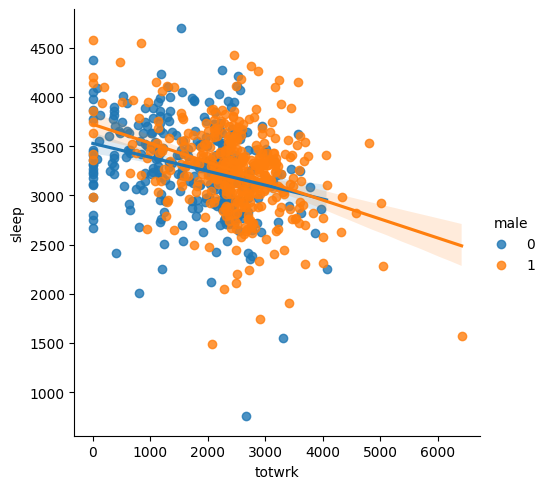

In [22]:
sns.lmplot(data=sleep_df, y='sleep', x='totwrk',hue='male')

In [23]:
slp.summary()

NameError: name 'slp' is not defined

In [ ]:
slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_ml = smf.ols(data= sleep_male, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_fml = smf.ols(data= sleep_female, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()

$$
H_0: \beta_{marr} = \gamma_{marr}; \; \sigma_1^2 = \sigma_2^2
$$

$$
F_{obl} = \frac{RSS_- (RSS_1 + RSS_2)}{RSS_1 + RSS_2} \cdot \frac{n_1 + n_2 - 2m}{m}
$$
$$
F \sim_{H_0} F_{m, n_1 + n_2-2m}
$$

In [ ]:
print(f'RSS:{slp.ssr.round(2)}, RSS_1:{slp_ml.ssr.round(2)},RSS_2:{slp_ml.ssr.round(2)} ')

In [ ]:
F_obl =( slp.ssr - (slp_ml.ssr + slp_fml.ssr) )/((slp_ml.ssr + slp_fml.ssr)) * (len( sleep_female ) + len( sleep_male ) - 14) / 7
F_obl

In [ ]:
alpha = 0.01
stats.f.ppf(1-alpha,7,len( sleep_female ) + len( sleep_male ) - 14  )